C:\Projects\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


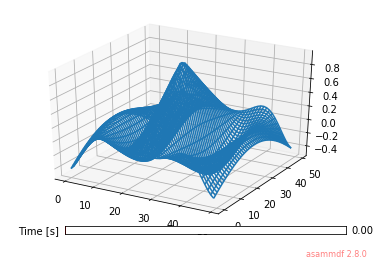

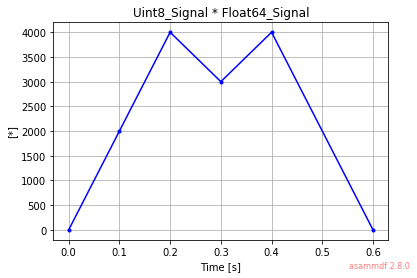

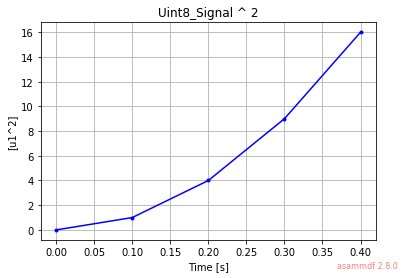

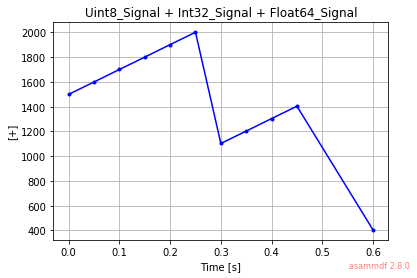

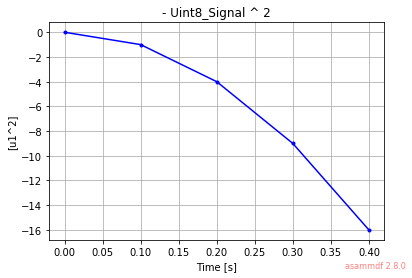

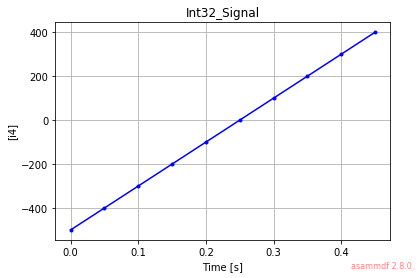

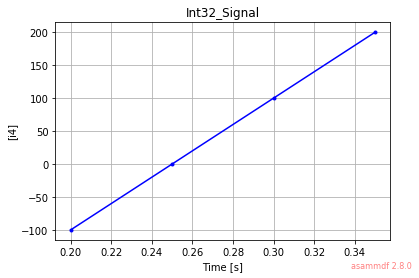

In [1]:
# -*- coding: utf-8 -*-
"""
*asammdf* Signal usage example
"""
from __future__ import print_function, division
from asammdf import Signal
import numpy as np


# create 3 Signal objects with different time stamps

# unit8 with 100ms time raster
timestamps = np.array([0.1 * t for t in range(5)], dtype=np.float32)
s_uint8 = Signal(samples=np.array([t for t in range(5)], dtype=np.uint8),
                 timestamps=timestamps,
                 name='Uint8_Signal',
                 unit='u1')

# int32 with 50ms time raster
timestamps = np.array([0.05 * t for t in range(10)], dtype=np.float32)
s_int32 = Signal(samples=np.array(list(range(-500, 500, 100)), dtype=np.int32),
                 timestamps=timestamps,
                 name='Int32_Signal',
                 unit='i4')

# float64 with 300ms time raster
timestamps = np.array([0.3 * t for t in range(3)], dtype=np.float32)
s_float64 = Signal(samples=np.array(list(range(2000, -1000, -1000)), dtype=np.int32),
                   timestamps=timestamps,
                   name='Float64_Signal',
                   unit='f8')

# map signals
xs = np.linspace(-1, 1, 50)
ys = np.linspace(-1, 1, 50)
X, Y = np.meshgrid(xs, ys)
vals = np.linspace(0, 180. / np.pi, 100)
phi = np.ones((len(vals), 50, 50), dtype=np.float64)
for i, val in enumerate(vals):
    phi[i] *= val
R = 1 - np.sqrt(X**2 + Y**2)
samples = np.cos(2 * np.pi * X + phi) * R

timestamps = np.arange(0, 2, 0.02)

s_map = Signal(samples=samples,
               timestamps=timestamps,
               name='Variable Map Signal',
               unit='dB')
s_map.plot()


prod = s_float64 * s_uint8
prod.name = 'Uint8_Signal * Float64_Signal'
prod.unit = '*'
prod.plot()

pow2 = s_uint8 ** 2
pow2.name = 'Uint8_Signal ^ 2'
pow2.unit = 'u1^2'
pow2.plot()

allsum = s_uint8 + s_int32 + s_float64
allsum.name = 'Uint8_Signal + Int32_Signal + Float64_Signal'
allsum.unit = '+'
allsum.plot()

# inplace operations
pow2 *= -1
pow2.name = '- Uint8_Signal ^ 2'
pow2.plot()

# cut signal
s_int32.plot()
cut_signal = s_int32.cut(start=0.2, stop=0.35)
cut_signal.plot()
